In [372]:
#Prepare a classification model using SVM for salary data 

#Data Description:
#age -- age of a person
#workclass	-- A work class is a grouping of work 
#maritalstatus -- Marital status of an individulas	
#occupation	 -- occupation of an individuals
#relationship -- 	
#race --  Race of an Individual
#sex --  Gender of an Individual
#capitalgain --  profit received from the sale of an investment	
#capitalloss	-- A decrease in the value of a capital asset
#hoursperweek -- number of hours work per week	
#native -- Native of an individual
#Salary -- salary of an individual


In [373]:
import numpy as np
import pandas as pd

In [374]:
data_train  = pd.read_csv("D:/DataScience/regression/SalaryData_Train(1).csv")

In [375]:
data_test = pd.read_csv("D:/DataScience/regression/SalaryData_Test(1).csv")

In [376]:
data_train.shape

(30161, 14)

In [377]:
data_test.shape

(15060, 14)

In [378]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [379]:
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [380]:
data_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [381]:
data_train.count()

age              30161
workclass        30161
education        30161
educationno      30161
maritalstatus    30161
occupation       30161
relationship     30161
race             30161
sex              30161
capitalgain      30161
capitalloss      30161
hoursperweek     30161
native           30161
Salary           30161
dtype: int64

In [382]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
age              30161 non-null int64
workclass        30161 non-null object
education        30161 non-null object
educationno      30161 non-null int64
maritalstatus    30161 non-null object
occupation       30161 non-null object
relationship     30161 non-null object
race             30161 non-null object
sex              30161 non-null object
capitalgain      30161 non-null int64
capitalloss      30161 non-null int64
hoursperweek     30161 non-null int64
native           30161 non-null object
Salary           30161 non-null object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [383]:
workclass_set = set(data_train['workclass'])
print(workclass_set)

{' State-gov', ' Self-emp-inc', ' Self-emp-not-inc', ' Without-pay', ' Federal-gov', ' Private', ' Local-gov'}


In [384]:
data_train.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [385]:
#data_train.dropna(subset='workclass')
#data_train['workclass'].fillna(-1)
# data_train.s
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [386]:
#{' State-gov', ' Self-emp-inc', ' Self-emp-not-inc', ' Without-pay', ' Federal-gov', ' Private', ' Local-gov'}
data_train['workclass'] = data_train['workclass'].map({' Self-emp-inc': 0, ' Private': 1, ' Self-emp-not-inc': 2, ' State-gov': 3, ' Without-pay': 4, ' Federal-gov': 5, ' Local-gov': 6}).astype(int)

In [387]:
data_test['workclass'] = data_test['workclass'].map({' Self-emp-inc': 0, ' Private': 1, ' Self-emp-not-inc': 2, ' State-gov': 3, ' Without-pay': 4, ' Federal-gov': 5, ' Local-gov': 6}).astype(int)

In [388]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,3,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,2,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,1,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,1,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,1,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [389]:
data_train.isnull().values.any()

False

In [390]:
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [391]:
import matplotlib as plt
%matplotlib inline

In [392]:
occupation_set = set(data_train['occupation'])
print(occupation_set)

{' Adm-clerical', ' Machine-op-inspct', ' Sales', ' Tech-support', ' Priv-house-serv', ' Prof-specialty', ' Armed-Forces', ' Other-service', ' Farming-fishing', ' Protective-serv', ' Transport-moving', ' Handlers-cleaners', ' Craft-repair', ' Exec-managerial'}


In [393]:
data_train['occupation'] = data_train['occupation'].map({' Adm-clerical': 0, ' Machine-op-inspct': 1, ' Sales': 2, ' Tech-support': 3, ' Priv-house-serv': 4, ' Prof-specialty': 5,' Armed-Forces': 6, ' Other-service': 7, ' Farming-fishing': 8, ' Protective-serv': 9, ' Transport-moving': 10, ' Handlers-cleaners': 11, ' Craft-repair': 12, ' Exec-managerial': 13}).astype(int)

In [394]:
data_test['occupation'] = data_test['occupation'].map({' Adm-clerical': 0, ' Machine-op-inspct': 1, ' Sales': 2, ' Tech-support': 3, ' Priv-house-serv': 4, ' Prof-specialty': 5,' Armed-Forces': 6, ' Other-service': 7, ' Farming-fishing': 8, ' Protective-serv': 9, ' Transport-moving': 10, ' Handlers-cleaners': 11, ' Craft-repair': 12, ' Exec-managerial': 13}).astype(int)

In [395]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,3,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,2,Bachelors,13,Married-civ-spouse,13,Husband,White,Male,0,0,13,United-States,<=50K
2,38,1,HS-grad,9,Divorced,11,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,1,11th,7,Married-civ-spouse,11,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,1,Bachelors,13,Married-civ-spouse,5,Wife,Black,Female,0,0,40,Cuba,<=50K


In [396]:
Salary_s = set(data_train['Salary'])
print(Salary_s)

{' <=50K', ' >50K'}


In [397]:
data_train['Salary'] = data_train['Salary'].map({' <=50K': 0, ' >50K': 1}).astype(int)

In [398]:
data_test['Salary'] = data_test['Salary'].map({' <=50K': 0, ' >50K': 1}).astype(int)

In [399]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,3,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,2,Bachelors,13,Married-civ-spouse,13,Husband,White,Male,0,0,13,United-States,0
2,38,1,HS-grad,9,Divorced,11,Not-in-family,White,Male,0,0,40,United-States,0
3,53,1,11th,7,Married-civ-spouse,11,Husband,Black,Male,0,0,40,United-States,0
4,28,1,Bachelors,13,Married-civ-spouse,5,Wife,Black,Female,0,0,40,Cuba,0


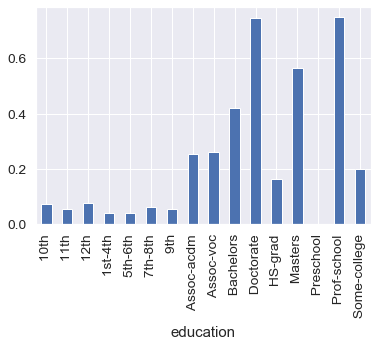

In [400]:
data_train.groupby('education').Salary.mean().plot(kind='bar')

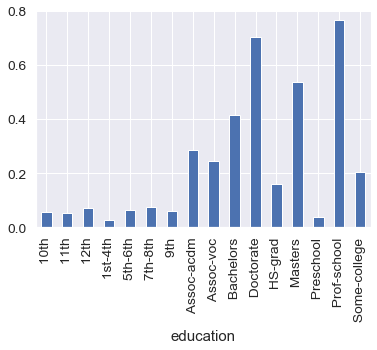

In [401]:
data_test.groupby('education').Salary.mean().plot(kind='bar')

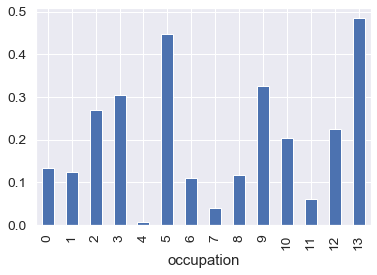

In [402]:
data_train.groupby('occupation').Salary.mean().plot(kind='bar')

In [403]:
from sklearn.model_selection import train_test_split

# Taking only the features that is important for now
X = data_train[['educationno', 'occupation']]

# Taking the labels (Income)
Y = data_train['Salary']

In [404]:
X1 = data_test[['educationno', 'occupation']]
Y1 = data_test['Salary']


In [405]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X, Y)

# Predicting the result and giving the accuracy
score = classifier.score(X1, Y1)

print(score)

C:\Users\agnis\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7766932270916335


In [406]:
data_train['sex'] = data_train['sex'].map({' Male': 0, ' Female': 1}).astype(int)

In [408]:
data_test['sex'] = data_test['sex'].map({' Male': 0, ' Female': 1}).astype(int)

In [409]:
race_set = set(data_train['race'])
print(race_set)

{' Black', ' White', ' Asian-Pac-Islander', ' Other', ' Amer-Indian-Eskimo'}


In [410]:
data_train['race'] = data_train['race'].map({' Black': 0, ' White': 1, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, ' Other':4}).astype(int)

In [411]:
data_test['race'] = data_test['race'].map({' Black': 0, ' White': 1, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, ' Other':4}).astype(int)

In [412]:
mstatus_set = set(data_train['maritalstatus'])
print(mstatus_set)

{' Married-AF-spouse', ' Divorced', ' Married-civ-spouse', ' Widowed', ' Never-married', ' Separated', ' Married-spouse-absent'}


In [413]:
data_train['maritalstatus'] = data_train['maritalstatus'].map({' Married-AF-spouse': 0, ' Divorced': 1, ' Married-civ-spouse': 2, ' Widowed': 3, ' Divorced': 4, ' Never-married': 5, ' Separated': 6, ' Married-spouse-absent':7}).astype(int)

In [414]:
data_test['maritalstatus'] = data_test['maritalstatus'].map({' Married-AF-spouse': 0, ' Divorced': 1, ' Married-civ-spouse': 2, ' Widowed': 3, ' Divorced': 4, ' Never-married': 5, ' Separated': 6, ' Married-spouse-absent':7}).astype(int)

In [415]:
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,3,Bachelors,13,5,0,Not-in-family,1,0,2174,0,40,United-States,0
1,50,2,Bachelors,13,2,13,Husband,1,0,0,0,13,United-States,0
2,38,1,HS-grad,9,4,11,Not-in-family,1,0,0,0,40,United-States,0
3,53,1,11th,7,2,11,Husband,0,0,0,0,40,United-States,0
4,28,1,Bachelors,13,2,5,Wife,0,1,0,0,40,Cuba,0


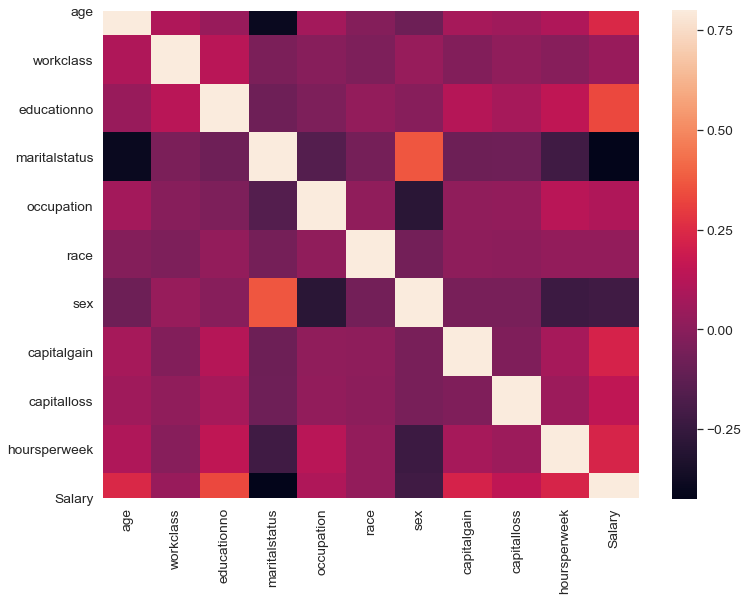

In [416]:
import seaborn as sns
import matplotlib.pyplot as pplt
#correlation matrix
corrmat = data_train.corr()
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

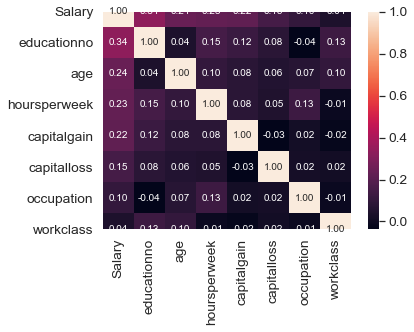

In [417]:
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Salary')['Salary'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

In [418]:
X = data_train[['educationno', 'age']]

# Taking the labels (Salary)
Y = data_train['Salary']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
#X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [419]:
X1 = data_test[['educationno', 'age']]

# Taking the labels (Salary)
Y1 = data_test['Salary']

In [420]:
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X, Y)

# Predicting the result and giving the accuracy
score = classifier.score(X1, Y1)

print(score)

C:\Users\agnis\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7861885790172642


In [421]:
#trying to increase accuracy

X = data_train[['educationno', 'age', 'hoursperweek', 'capitalgain']]

# Taking the labels (Salary)
Y = data_train['Salary']

In [422]:
X1 = data_test[['educationno', 'age', 'hoursperweek', 'capitalgain']]

# Taking the labels (Salary)
Y1 = data_test['Salary']

In [423]:
# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X, Y)

# Predicting the result and giving the accuracy
score = classifier.score(X1, Y1)

print(score)

C:\Users\agnis\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8047144754316069


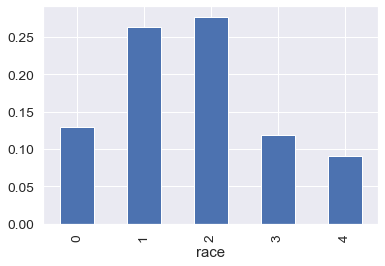

In [425]:
data_train.groupby('race').Salary.mean().plot(kind='bar')

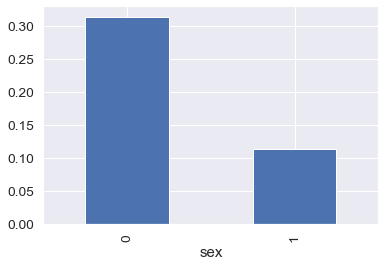

In [426]:
data_train.groupby('sex').Salary.mean().plot(kind='bar')

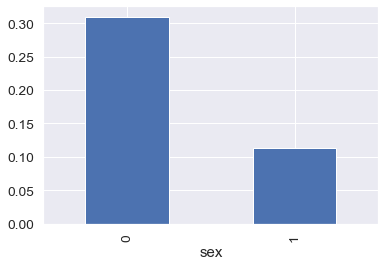

In [429]:
data_test.groupby('sex').Salary.mean().plot(kind='bar')

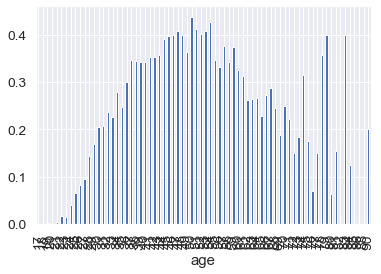

In [427]:
# Mean below 20 years old
data_train.groupby('age').Salary.mean().plot(kind='bar')

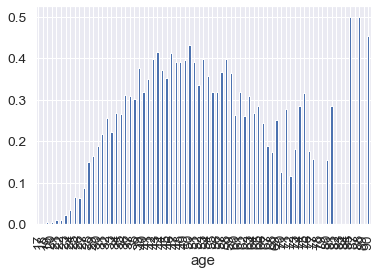

In [428]:
data_test.groupby('age').Salary.mean().plot(kind='bar')

CONCLUSION

In [ ]:
#We achieved our goal by seeing the data closer, trying to understand it's realtions among the features. After that, we explore the data a little bit more and learnt that:
#Men have more chances to have a higher income
#White and Asian Pacific Islanders have more chances than other races
#Income sort of follows the normal deviation, with a peak at 50 years old
